In [ ]:
pip install underthesea

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk import word_tokenize
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize

In [ ]:
data= pd.read_csv("/content/data - data.csv")
data

,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN
...,...,...,...,...
31455,Không đáng tiền.,NEG,1,NaN
31456,Quần rất đẹp.,POS,5,NaN
31457,Hàng đẹp đúng giá tiền.,POS,5,NaN
31458,Chất vải khá ổn.,POS,4,NaN


In [ ]:
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     31460 non-null  object
 1   label       31460 non-null  object
 2   rate        31460 non-null  int64 
 3   Unnamed: 3  23 non-null     object
dtypes: int64(1), object(3)
memory usage: 983.2+ KB
comment           0
label             0
rate              0
Unnamed: 3    31437
dtype: int64


In [ ]:
if 'Unnamed: 3' in data.columns:
    data = data.drop(columns=['Unnamed: 3'])

In [ ]:
data["label"].unique()

array(['POS', 'NEG', 'NEU'], dtype=object)

In [ ]:
import pandas as pd
import re
from underthesea import word_tokenize

stop_words_df = pd.read_csv('/content/vietnamese-stopwords-dash.txt', header=None)  # Đảm bảo file có cấu trúc đúng
stop_words = set(stop_words_df[0].values)  # Chuyển thành set

# Hàm loại bỏ stop words và tách từ
def process_sentences(sentence):
    sentence = re.sub(r'[^\w\d]', ' ', sentence)
    sentence_tokenizer = word_tokenize(sentence)
    sentence_tokenizer = [word.lower().replace(" ", "_") for word in sentence_tokenizer if word not in stop_words and len(word) > 1]
    return " ".join(sentence_tokenizer)

data['comment'] = data['comment'].apply(process_sentences)
data


,comment,label,rate
0,áo bao đẹp,POS,5
1,tuyệt_vời,POS,5
2,day ao khong_giong,NEG,1
3,mùi thơm bôi da mềm da,POS,5
4,vải đẹp dày dặn,POS,5
...,...,...,...
31455,không tiền,NEG,1
31456,quần đẹp,POS,5
31457,hàng đẹp giá tiền,POS,5
31458,chất vải ổn,POS,4


In [ ]:
data = data.drop(columns=['rate'], axis=1)

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.head()

,comment,label
28079,chất_lượng sản_phẩm tuyệt_vời shop phục_vụ rất...,POS
9072,có đáp_bụng chun bầu bí_mặc quần thoải_mái lắm...,POS
24976,sẽ tiếp_tục ủng_hộ shop,POS
9577,chất_lượng sản_phẩm tuyệt_vờ đóng_gói sản_phẩm...,POS
23682,tất_cute lắm đi thoải_mái nha shop,POS


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from collections import Counter
from underthesea import word_tokenize

def load_and_preprocess_data(file_path, stop_words_path):
    # Load data
    data = pd.read_csv(file_path)

    # Check for null values
    print(data.isnull().sum())

    # Drop unnecessary columns
    if 'Unnamed: 3' in data.columns:
        data = data.drop(columns=['Unnamed: 3'])

    # Unique labels
    print(data["label"].unique())

    # Load stop words
    stop_words_df = pd.read_csv(stop_words_path, header=None)
    stop_words = set(stop_words_df[0].values)

    # Function to process sentences
    def process_sentences(sentence):
        sentence = re.sub(r'[^\w\d]', ' ', sentence)
        sentence_tokenizer = word_tokenize(sentence)
        sentence_tokenizer = [
            word.lower().replace(" ", "_")
            for word in sentence_tokenizer
            if word not in stop_words and len(word) > 1
        ]
        return " ".join(sentence_tokenizer)

    # Apply processing to the 'comment' column
    data['comment'] = data['comment'].apply(process_sentences)

    # Drop unused columns
    data = data.drop(columns=['rate'], axis=1)

    # Split data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

    return train_data, test_data

# Example usage
train_data, test_data = load_and_preprocess_data("/content/data - data.csv", "/content/vietnamese-stopwords-dash.txt")



comment           0
label             0
rate              0
Unnamed: 3    31437
dtype: int64
['POS' 'NEG' 'NEU']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

def load_and_preprocess_data(file_path, stop_words_path):
    # Load data
    data = pd.read_csv(file_path)

    # Check for null values
    print(data.isnull().sum())

    # Drop unnecessary columns
    if 'Unnamed: 3' in data.columns:
        data = data.drop(columns=['Unnamed: 3'])

    # Load stop words
    stop_words_df = pd.read_csv(stop_words_path, header=None)
    stop_words = set(stop_words_df[0].values)

    # Process sentences
    def process_sentences(sentence):
        sentence = re.sub(r'[^\w\d]', ' ', sentence)
        sentence_tokenizer = word_tokenize(sentence)
        sentence_tokenizer = [
            word.lower().replace(" ", "_")
            for word in sentence_tokenizer
            if word not in stop_words and len(word) > 1
        ]
        return " ".join(sentence_tokenizer)

    # Apply processing to the 'comment' column
    data['comment'] = data['comment'].apply(process_sentences)

    # Drop unused columns
    if 'rate' in data.columns:
        data = data.drop(columns=['rate'], axis=1)

    return data

def train_and_evaluate_model(data):

    # Split data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

    # Vectorization
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data['comment'])
    X_test = vectorizer.transform(test_data['comment'])
    y_train = train_data['label']
    y_test = test_data['label']

    # Train Decision Tree Classifier
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)

    # Evaluate Decision Tree
    print("Decision Tree Classifier:")
    print("Accuracy:", accuracy_score(y_test, dt_pred))
    print(classification_report(y_test, dt_pred))

    # Train Logistic Regression Classifier
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    # Evaluate Logistic Regression
    print("Logistic Regression Classifier:")
    print("Accuracy:", accuracy_score(y_test, lr_pred))
    print(classification_report(y_test, lr_pred))

    # Tạo mô hình Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Dự đoán
    y_pred = nb_model.predict(X_test)

    # Đánh giá mô hình
    print("Naive Bayes Classifier:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Example usage
data = load_and_preprocess_data("/content/data - data.csv", "/content/vietnamese-stopwords-dash.txt")
train_and_evaluate_model(data)

comment           0
label             0
rate              0
Unnamed: 3    31437
dtype: int64
Decision Tree Classifier:
Accuracy: 0.7004132231404959
              precision    recall  f1-score   support

         NEG       0.57      0.58      0.58      1333
         NEU       0.31      0.23      0.27       978
         POS       0.81      0.85      0.83      3981

    accuracy                           0.70      6292
   macro avg       0.56      0.56      0.56      6292
weighted avg       0.68      0.70      0.69      6292

Logistic Regression Classifier:
Accuracy: 0.748410680228862
              precision    recall  f1-score   support

         NEG       0.65      0.66      0.66      1333
         NEU       0.40      0.17      0.24       978
         POS       0.81      0.92      0.86      3981

    accuracy                           0.75      6292
   macro avg       0.62      0.58      0.59      6292
weighted avg       0.71      0.75      0.72      6292

Naive Bayes Classifier:
Accura

In [ ]:
pip install matplotlib seaborn

In [ ]:
import pandas as pd

# Tải dữ liệu
data = pd.read_csv("/content/data - data.csv")
if 'Unnamed: 3' in data.columns:
    data = data.drop(columns=['Unnamed: 3'])
# Thống kê mô tả
print(data.describe())

# Kiểm tra số lượng bản ghi theo từng nhãn
print(data['label'].value_counts())

               rate
count  31460.000000
mean       3.736840
std        1.382483
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
label
POS    20093
NEG     6669
NEU     4698
Name: count, dtype: int64


<ipython-input-40-74edbfc0a6cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='label', palette='viridis')


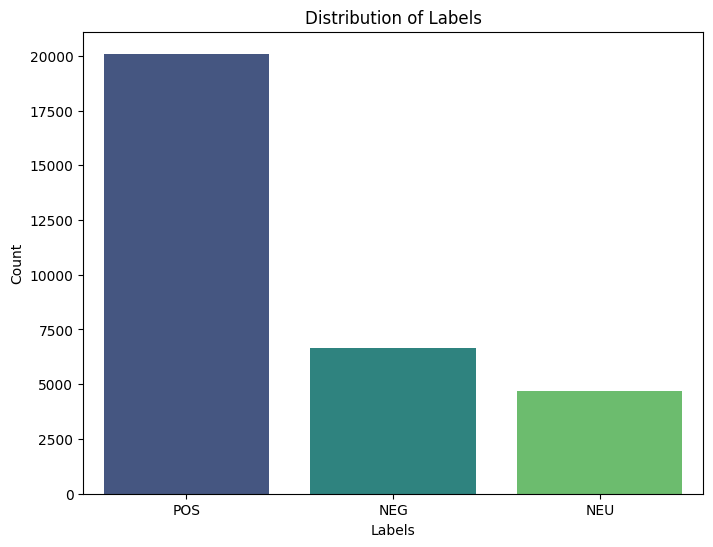

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Trực quan hóa phân phối nhãn
plt.figure(figsize=(8, 6))
sns.countplot(data, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

<ipython-input-41-f89b899308ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


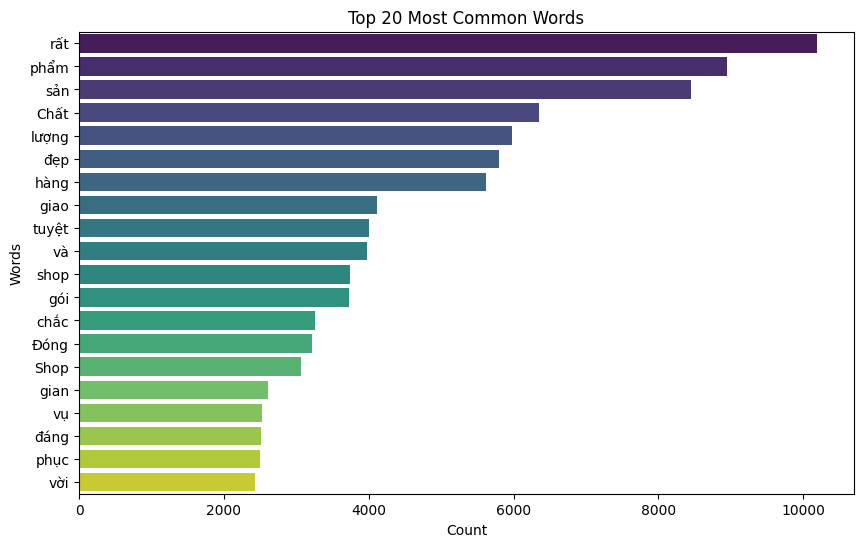

In [ ]:
from collections import Counter
import re

# Tạo một danh sách từ
all_words = ' '.join(data['comment']).split()
word_freq = Counter(all_words)

# Lấy 10 từ phổ biến nhất
most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

# Trực quan hóa từ phổ biến
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()